# Surrogate VAWT Optimization by means of Metaheuristic Algorithms

## Initialization

In [ ]:
from joblib import dump, load
from sklearn.ensemble import RandomForestRegressor
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

#Import ABC Algorithm
from ipynb.fs.full.ABCv4 import beeColony
from ipynb.fs.full.ABCv4 import SeleccionRuletaBee
from ipynb.fs.full.ABCv4 import ValorEsperadoBee

#Import Genetic Algorithm
from ipynb.fs.full.GAv2 import algoritmoGenetico
from ipynb.fs.full.GAv2 import poblacionInicial
from ipynb.fs.full.GAv2 import codepoblacionReal2bin
from ipynb.fs.full.GAv2 import decodificarPob
from ipynb.fs.full.GAv2 import codeBinary2Real
from ipynb.fs.full.GAv2 import AptitudProporcional
from ipynb.fs.full.GAv2 import Ruleta
from ipynb.fs.full.GAv2 import ValorEsperado
from ipynb.fs.full.GAv2 import SobranteEstocastico
from ipynb.fs.full.GAv2 import universalEstocastico
from ipynb.fs.full.GAv2 import torneo
from ipynb.fs.full.GAv2 import seleccionDisruptiva
from ipynb.fs.full.GAv2 import cruzaNPunto
from ipynb.fs.full.GAv2 import mutacionBinaria

#Import PSO Algorithm
from ipynb.fs.full.PSOv1 import poblation_creation
from ipynb.fs.full.PSOv1 import pso

In [ ]:
# Loading surrogate model of VAWT
ModeloRFR = load('ModeloRFR_2.joblib')

## Optimization process

### ABC Optimization

In [ ]:
HistorialPob, HistSoluciones = beeColony(ModeloRFR.predict,10,10,[[40,90],[0.1,0.3],[140,200],[0.6,0.6]],Niteraciones=100,
                                         SeleccionRuletaBee,steps=150,case='maximo')

Inicializando algoritmo
Ejecutando optimizacion con Artificial Bee Colony Algorithm...
Optimizacion finalizada


In [ ]:
print('The optimal geometry for Savonius VAWT is:\n',HistSoluciones[-1])
print('Cp Max:\n',ModeloRFR.predict([HistSoluciones[-1]]))

La Geometria optima para el Aerogenerador Savonius es:
 [47.07797198914393, 0.13538572891793937, 192.96840684254346, 0.6]
Cp maximo:
 [0.1216873]


El Cp con la geometria optima es:

[0.0325221 0.0579889 0.0880336 0.1048802 0.1150859 0.1216873 0.1131614
 0.0862497]


Text(0, 0.5, 'Cp')

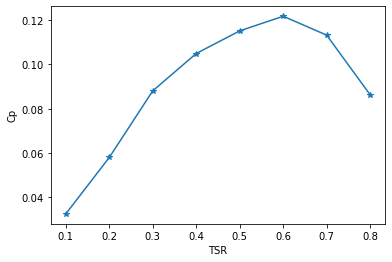

In [ ]:
print('The Cp for the optimal geometry is:\n')
entrada = list()
geometria = HistSoluciones[-1]
for i in np.arange(0.1,0.9,0.1):    
    entrada.append(geometria[0:3]+[i])        
Cp = ModeloRFR.predict(entrada)
print(Cp)
plt.plot(np.arange(0.1,0.9,0.1),Cp,marker='*')
plt.xlabel('TSR')
plt.ylabel('Cp')

### GA Optimization

In [ ]:
theta_l = [40,90]
Or_l = [0.1,0.3]
OA_l = [140,200]
TSR_l = [0.59,0.6]
poblacion = poblacionInicial(10,[theta_l,Or_l,OA_l,TSR_l])
binPoblacion, n = codepoblacionReal2bin(poblacion,[[theta_l[1],theta_l[0],0.01],[Or_l[1],Or_l[0],0.01],
                                                   [OA_l[1],OA_l[0],0.01],[TSR_l[1],TSR_l[0],0.001]]) 

paramCodi = [{"Xu":theta_l[1],"Xl":theta_l[0],"n":n[0]},{"Xu":Or_l[1],"Xl":Or_l[0],"n":n[1]},
             {"Xu":OA_l[1],"Xl":OA_l[0],"n":n[2]},{"Xu":TSR_l[1],"Xl":TSR_l[0],"n":n[3]}]
                                                 {"Xu":OA_l[1],"Xl":OA_l[0],"n":n[2]},{"Xu":TSR_l[1],"Xl":TSR_l[0],"n":n[3]}]))

In [ ]:
decoPoblacion, histBest = algoritmoGenetico(ModeloRFR.predict,binPoblacion,codeBinary2Real,50,
                                                        Aptitud=AptitudProporcional,Seleccion=torneo,
                                                        cruza=cruzaNPunto,mutacion=mutacionBinaria,SelecParameter={"p":2}, 
                                                        cruzaParameter={"n":3},mutacionParameters={'umbral':0.01},
                                                        codeParameter=paramCodi,case='maximo')                                                    

Realizando optimizacion con GA...
Optimizacion finalizada


In [ ]:
print('La poblacion final es:')
for geometria in decoPoblacion: print(geometria)

La poblacion final es:
[43.724053724053725, 0.14, 185.87545787545787, 0.5985714285714285]
[45.28693528693529, 0.14, 185.87545787545787, 0.5985714285714285]
[43.724053724053725, 0.14, 185.87545787545787, 0.5985714285714285]
[43.724053724053725, 0.14, 185.87545787545787, 0.5985714285714285]
[43.724053724053725, 0.14, 185.87545787545787, 0.5957142857142856]
[56.227106227106226, 0.14, 185.87545787545787, 0.5985714285714285]
[43.724053724053725, 0.14, 155.86813186813185, 0.5985714285714285]
[43.724053724053725, 0.14, 185.87545787545787, 0.5985714285714285]
[43.724053724053725, 0.14, 185.87545787545787, 0.5985714285714285]
[43.724053724053725, 0.14, 185.87545787545787, 0.5985714285714285]


La geometria optima es 
 [44.004884004884005, 0.12666666666666668, 197.56776556776558, 0.6]
El Cp con la geometria optima es:

[0.0325221 0.0579889 0.0880336 0.1048802 0.1150859 0.1216873 0.1131614
 0.0862497]


Text(0, 0.5, 'Cp')

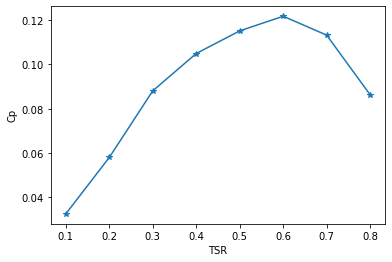

In [ ]:
print('La geometria optima es \n',histSolucion[-1])
print('El Cp con la geometria optima es:\n')
entrada = list()
geometria = histSolucion[-1]
for i in np.arange(0.1,0.9,0.1):    
    entrada.append(geometria[0:3]+[i])        
Cp = ModeloRFR.predict(entrada)
print(Cp)
plt.plot(np.arange(0.1,0.9,0.1),Cp,marker='*')
plt.xlabel('TSR')
plt.ylabel('Cp')

### PSO Optimization

In [ ]:
VariableLimits=[{"name":"theta","upper":90,"lower":40},{"name":"Or","upper":0.3,"lower":0.1},{"name":"OA","upper":200,"lower":140},
               {"name":"TSR","upper":0.6,"lower":0.4}]
populationNumber = 81
Pobla_uniforme=poblation_creation(VariableLimits,populationNumber)

In [ ]:
Poblacion,mejor,HistBest=pso(ModeloRFR.predict,Pobla_uniforme,CogConst=1.3,SocialConst=0.7,Inertia={"min":0 ,"max":1.2,"delta":0.95,"gen":10},iterations=40,case='maximo')

Inicializando algoritmo...
Realizando optimizacion con PSO..
Optimizacion finalizada.


La geometria optima es 
 [40.00005447605338, 0.10000011714383054, 199.99999999773948, 0.5999999998002048]
El Cp con la geometria optima es:

[0.0325221 0.0579889 0.0880336 0.1048802 0.1150859 0.1216873 0.1131614
 0.0862497]


Text(0, 0.5, 'Cp')

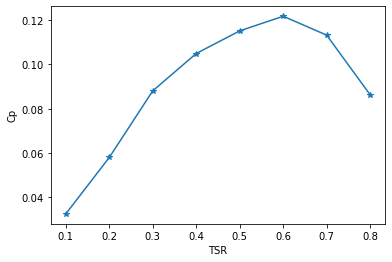

In [ ]:
print('La geometria optima es \n',mejor['position'])
print('El Cp con la geometria optima es:\n')
entrada = list()
geometria = mejor['position']
for i in np.arange(0.1,0.9,0.1):    
    entrada.append(geometria[0:3]+[i])        
Cp = ModeloRFR.predict(entrada)
print(Cp)
plt.plot(np.arange(0.1,0.9,0.1),Cp,marker='*')
plt.xlabel('TSR')
plt.ylabel('Cp')